In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy import integrate
import matplotlib as mpl
from scipy import interpolate
import time

from ABM_SIR import *

KeyError: 'S'

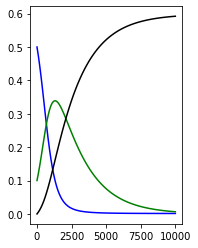

In [2]:
s0 = 0.5
i0 = 0.1
r0 = 0

fig = plt.figure()

ax = fig.add_subplot(1,2,1)

ri = 0.005
rr = ri/10.0
t = np.linspace(0,5.0/rr,100)

SIR_y = ODE_sim(np.array([ri,rr]),SIR_ODE,t,np.array([s0,i0,r0]))
        
plt.plot(t,SIR_y[0,:],'b-')
plt.plot(t,SIR_y[1,:],'g-')
plt.plot(t,SIR_y[2,:],'k-')

mat = np.load("../data/SIR_ABM_ri_"+str(round(ri,3)) + "_rr_"+str(round(rr,3)) + "_real25.npy",allow_pickle=True,encoding="latin1").item()

plt.plot(t,mat['S'],'b--')
plt.plot(t,mat['I'],'g--')
plt.plot(t,mat['R'],'k--')



ax = fig.add_subplot(1,2,2)

ri = 0.01
rr = ri/10.0
t = np.linspace(0,5.0/rr,100)

SIR_y = ODE_sim(np.array([ri,rr]),SIR_ODE,t,np.array([s0,i0,r0]))
        
plt.plot(t,SIR_y[0,:],'b-')
plt.plot(t,SIR_y[1,:],'g-')
plt.plot(t,SIR_y[2,:],'k-')

mat = np.load("../data/SIR_ABM_ri_"+str(round(ri,3)) + "_rr_"+str(round(rr,3)) + "_real25.npy",allow_pickle=True,encoding="latin1").item()

plt.plot(t,mat['S'],'b--')
plt.plot(t,mat['I'],'g--')
plt.plot(t,mat['R'],'k--')


In [ ]:
fig = plt.figure(figsize=(8,8))

rr_str_list = ['ri/10','ri/4','ri/2','ri']

count = 1
for i,ri in enumerate([.25,.1,.01,.005]):
    for j,rr in enumerate([ri/10.0,ri/4.0,ri/2.0,ri]):
        
        ax = fig.add_subplot(4,4,count)
        count+=1
        
        t = np.linspace(0,5.0/rr,100)

        SIR_y = ODE_sim(np.array([ri,rr]),SIR_ODE,t,np.array([s0,i0,r0]))

        plt.plot(t,SIR_y[0,:],'b-')
        plt.plot(t,SIR_y[1,:],'g-')
        plt.plot(t,SIR_y[2,:],'k-')

        mat = np.load("../data/SIR_ABM_ri_"+str(round(ri,3)) + "_rr_"+str(round(rr,3)) + "_real25.npy",allow_pickle=True,encoding="latin1").item()

        plt.plot(t,mat['variables'][:,1],'b--')
        plt.plot(t,mat['variables'][:,3],'g--')
        plt.plot(t,mat['variables'][:,5],'k--')
        
        #ax.set_xticks([])
        #ax.set_yticks([])
        
        if i == 0:
            ax.set_title("rr = "+rr_str_list[j])
        if j == 0:
            ax.set_ylabel("ri = "+str(ri))




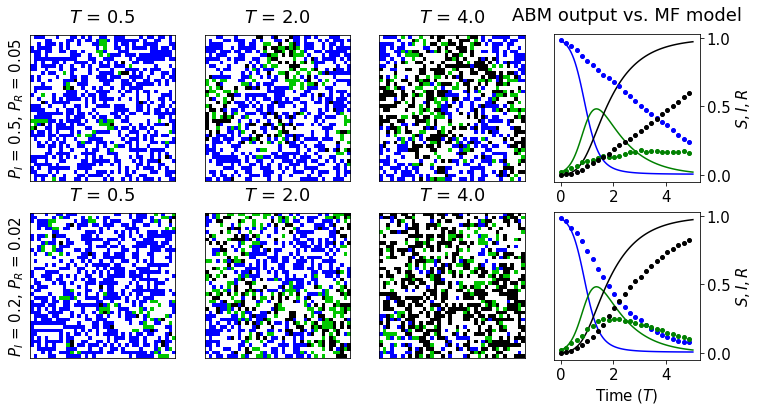

In [5]:
s0 = 0.49
i0 = 0.01
r0 = 0

N = s0 + i0 + r0

rm = 1.0

T_end = 5.0

cmaplist = [(1.0,1.0,1.0,1.0),(0.0,0.0,1.0,1.0),(0.0,200.0/256.0,0.0,1.0),(0.0,0.0,0.0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 4)

font = {'size'   : 15}

plt.rc('font', **font)

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(2,4,4,adjustable='box')


ri = 0.5
rr = ri/10.0
t = np.linspace(0,T_end/rr,100)

SIR_y = ODE_sim(np.array([ri*N,rr]),SIR_ODE,t,np.array([s0/N,i0/N,r0/N]))
        
ax.plot(rr*t,SIR_y[0,:],'b-',label="S")
ax.plot(rr*t,SIR_y[1,:],'g-',label="I")
ax.plot(rr*t,SIR_y[2,:],'k-',label="R")

atit = ax.set_title("ABM output vs. MF model")
atit.set_position((0.5,1.05))
ax.set_ylabel("$S,I,R$")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

S,I,R,t,A_list,_ = SIR_ABM(ri,rr,rm,T_end)

ax.plot(rr*t[::4],S[::4],'b.',markersize=8)
ax.plot(rr*t[::4],I[::4],'g.',markersize=8)
ax.plot(rr*t[::4],R[::4],'k.',markersize=8)


T = ["0.5","2.0","4.0"]
plot_ind = [2,7,15]


for i in np.arange(3):

    ax = fig.add_subplot(2,4,1+i,adjustable='box')
    ax.matshow(A_list[plot_ind[i]],cmap=cmap,vmax=3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("$T$ = " + T[i])

    if i == 0:
        ax.set_ylabel("$P_I$ = "+str(ri)+", $P_R$ = "+str(rr))


ax = fig.add_subplot(2,4,8,adjustable='box')

ri = 0.2
rr = ri/10.0
t = np.linspace(0,5.0/rr,100)

SIR_y = ODE_sim(np.array([ri*N,rr]),SIR_ODE,t,np.array([s0/N,i0/N,r0/N]))
        
ax.plot(rr*t,SIR_y[0,:],'b-',label='MF Model')
ax.plot(rr*t,SIR_y[1,:],'g-')
ax.plot(rr*t,SIR_y[2,:],'k-')

ax.set_ylabel("$S,I,R$")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("Time ($T$)")

S,I,R,t,A_list,_ = SIR_ABM(ri,rr,rm,T_end)

ax.plot(rr*t[::4],S[::4],'b.',markersize=8,label="ABM Data")
ax.plot(rr*t[::4],I[::4],'g.',markersize=8)
ax.plot(rr*t[::4],R[::4],'k.',markersize=8)

#plt.legend()#loc=6)

T = ["0.5","2.0","4.0"]
plot_ind = [2,7,15]


for i in np.arange(3):

    ax = fig.add_subplot(2,4,5+i,adjustable='box')
    ax.matshow(A_list[plot_ind[i]],cmap=cmap,vmax=3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("$T$ = " + T[i])

    if i == 0:
        ax.set_ylabel("$P_I$ = "+str(ri)+", $P_R$ = "+str(rr))

#plt.suptitle("SIR ABM and DE Model Comparisons")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

#plt.savefig("figures/SIR_ABM_compare_legend.pdf",format="pdf")

## Plotting individual simulation

NameError: name 'S' is not defined

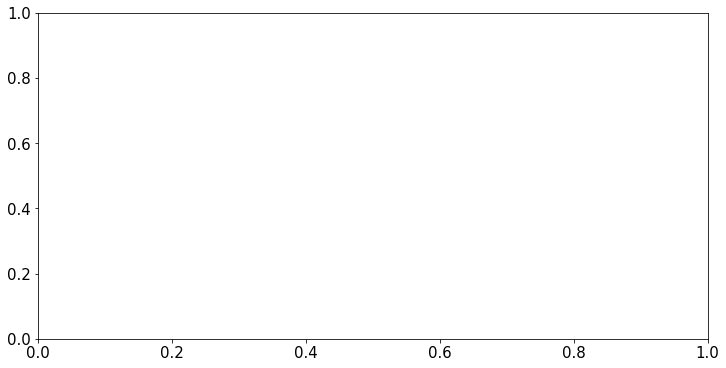

In [3]:
T_end = 5.0

ri = 0.01
rr = ri/10.0
t = np.linspace(0,T_end/rr,100)

rm = 1.0



cmaplist = [(1.0,1.0,1.0,1.0),(0.0,0.0,1.0,1.0),(0.0,200.0/256.0,0.0,1.0),(0.0,0.0,0.0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 4)

font = {'size'   : 15}

plt.rc('font', **font)

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,1,1)#4,4)

#S,I,R,t,A_list,N = SIR_ABM(ri,rr,rm,T_end)

ax.plot(rr*t[::4],S[::4],'b.',markersize=8)
ax.plot(rr*t[::4],I[::4],'g.',markersize=8)
ax.plot(rr*t[::4],R[::4],'k.',markersize=8)


SIR_y = ODE_sim(np.array([ri/2.0,rr]),SIR_ODE,t,np.array([S[0],I[0],R[0]]))
        
ax.plot(rr*t,SIR_y[0,:],'b-',label="S")
ax.plot(rr*t,SIR_y[1,:],'g-',label="I")
ax.plot(rr*t,SIR_y[2,:],'k-',label="R")

ax.set_title("ABM Output vs. MF Model")
ax.set_ylabel("$S,I,R$")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()



'''ax = fig.add_subplot(1,4,1)
ax.matshow(A_list[6][:40,:40],cmap=cmap,vmax=3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("$T$ = 1.5")

ax.set_ylabel("$P_I$ = "+str(ri)+", $P_R$ = "+str(rr))

ax = fig.add_subplot(1,4,2)
ax.matshow(A_list[13][:40,:40],cmap=cmap,vmax=3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("$T$ = 3.0")

ax = fig.add_subplot(1,4,3)
ax.matshow(A_list[-1][:40,:40],cmap=cmap,vmax=3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("$T$ = 5.0")'''


#plt.savefig("figures/SIR_ABM_compare.pdf",format="pdf")